In [6]:
# LINEAR REGRESSION

import pandas as pd
from sklearn import linear_model 
import matplotlib.pyplot as plt

# Lets read the csv file and look at the data
norw_data = pd.read_csv('NAS.csv')
norw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# We see that there are several NaN values
# Lets take a closer look
norw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4253 non-null   object 
 1   Open       4218 non-null   float64
 2   High       4218 non-null   float64
 3   Low        4218 non-null   float64
 4   Close      4218 non-null   float64
 5   Adj Close  4218 non-null   float64
 6   Volume     4218 non-null   float64
dtypes: float64(6), object(1)
memory usage: 232.7+ KB


In [8]:
# Lets look at the percentage of missing values in the dataset
norw_data.isnull().sum()/len(norw_data)*100

# The output shows us that all of the columns except the first one
# has some missing values (< 1%)

Date         0.000000
Open         0.822949
High         0.822949
Low          0.822949
Close        0.822949
Adj Close    0.822949
Volume       0.822949
dtype: float64

In [9]:
# Let's delete those values 
norw_data = norw_data.dropna(axis='rows', how='any')

In [10]:
# Lets convert the Date column to datetime 
norw_data.iloc[:, 0] = pd.to_datetime(norw_data.iloc[:, 0]) 

In [11]:
# Lets extract only the relevant columns
# We're gonna work with the dates and the close values

norw_data = norw_data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [12]:
# Let's take a look at the data now
norw_data.head()

,Date,Close
0,2003-12-18,19.139799
1,2003-12-19,18.454201
2,2003-12-22,18.054300
3,2003-12-23,17.425800
7,2003-12-29,17.254400


In [34]:
# Now we create a linear regression object and fit it to the data
from sklearn.linear_model import LinearRegression

regObj = linear_model.LinearRegression()

In [35]:
import datetime as dt
date = norw_data.drop('Close', axis='columns') # input data
#date = norw_data['Date'].map(dt.datetime.toordinal)
date = date.values.reshape(-1, 1)
close = norw_data.Close # output data

In [41]:
from sklearn.model_selection import train_test_split

# Splitting the data into random train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(date, close, test_size=0.2, random_state=0)

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_regObj = PolynomialFeatures(degree=4)

In [45]:
X_poly = poly_regObj.fit_transform(date)
pol_regObj = LinearRegression()
pol_regObj.fit(X_poly, close)

LinearRegression()

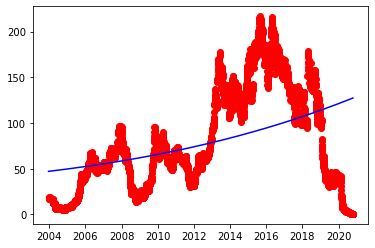

In [61]:
plt.scatter(date, close, color='red')
plt.plot(date, pol_regObj.predict(poly_regObj.fit_transform(date)), color='blue')

In [62]:
pol_regObj.predict(poly_regObj.fit_transform([[2021-11-11]])) # Prediction

array([27.13214158])

In [51]:
# Proof of Equation
coefficient = pol_regObj.coef_
coefficient

array([0.00000000e+000, 0.00000000e+000, 4.72592412e-108, 8.32587060e-090,
       1.51895390e-071])

In [52]:
intercept=pol_regObj.intercept_
intercept

27.132141581177336

In [53]:
coefficient *(2020-10-16)+intercept

array([27.13214158, 27.13214158, 27.13214158, 27.13214158, 27.13214158])